# Task: Prediction Using Supervised model (linear regression)
## Author: Hemanth Reddy 
## batch:#gripjune2022

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


## Step 1: Importing the required libraries

In [1]:
#Importing the required libraries for the gives task
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Step 2: Importing the data 

In [2]:
#importing the data required for the task 
url = "http://bit.ly/w-data"
task_data=pd.read_csv(url)
task_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##Step 3:Visualization of the data

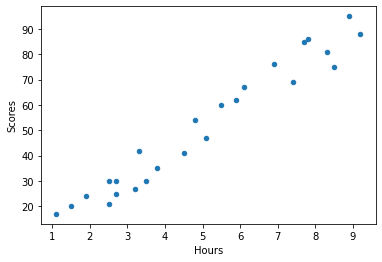

In [3]:
#visualization of the dataset
task_data.plot(kind="scatter", x="Hours",y="Scores")

### Observation:Here we can see that the data already shows a linear behaviour or the scores and no. of hours studied are proportionate to each other.


# we use pandas dataframe for the iloc funtion which helps in slicing the data

In [4]:
X = task_data.iloc[:, :-1].values 
Y = task_data.iloc[:, 1].values  

####Here we used iloc function to slice the data so that we can have inputs and outputs, In order to split the data into the train and test datsets.####

####.values will help convert the data to object####

##Step 4:Train the Model

In [5]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## To understand better about the train_test_split please refer the below given link.##
https://towardsdatascience.com/understanding-train-test-split-scikit-learn-python-ea676d5e3d1

## Step 5:To Train the Algorithm

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

### we need to fit the train dataset in to the model so that the predicted values will be closer to the observed values or else there will be overfitting or noise in the data

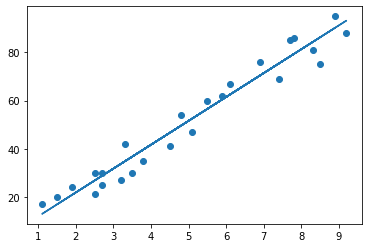

In [11]:
#Visalize the data fitting
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

##Step 6:Making Predictions.

In [13]:
Y_pred = regressor.predict(X_test) # Predicting the scores
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [14]:
print(Y_test)

[20 27 69 30 62]


In [46]:
pd.DataFrame({"Actual" :Y_test,"predicted" :Y_pred})

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#Step 7:Task question-What will be the predicted score if the student studies for 9.5 hours/day

In [34]:
hours_studied= 9.25
hours_studied=np.array(hours_studied)
hours_studied=hours_studied.reshape(-1,1)
own_pred = regressor.predict(hours_studied)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


#Step 8:Evaluating the model.

In [38]:
#using RMSE(root mean square error)
from sklearn.metrics import mean_squared_error
import math
actual = Y_test
predicted = Y_pred
MSE = mean_squared_error(actual,predicted)
rmse = math.sqrt(MSE)
print(rmse)

4.647447612100373


In [39]:
#using MSE(mean squared error)
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982
